In [2]:
import pandas as pd
import numpy as  np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("train.csv")

# Data Dictonary

Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.



In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [7]:
df.shape

(193573, 11)

In [8]:
df.describe(include="O")

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [9]:
cat_cols=[i for i in df.columns if df[i].dtypes=="object"]

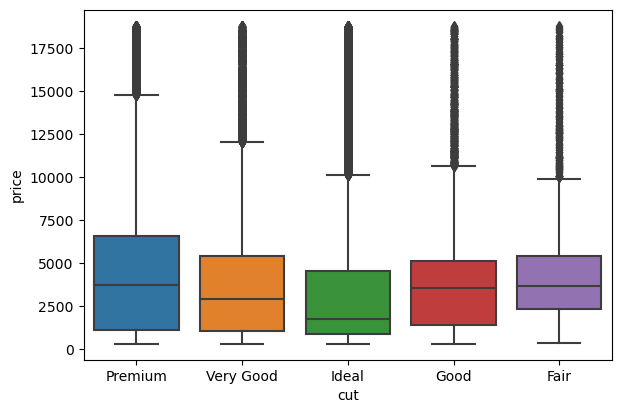

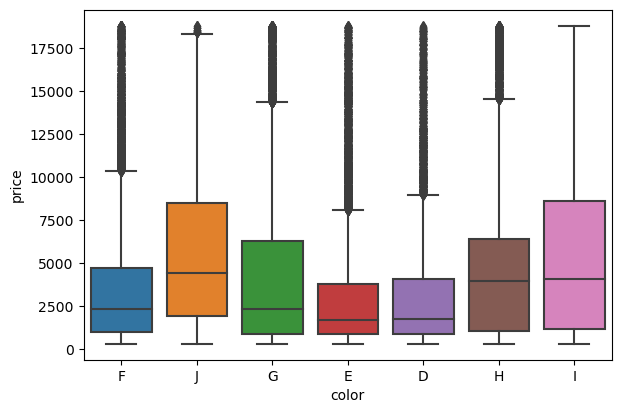

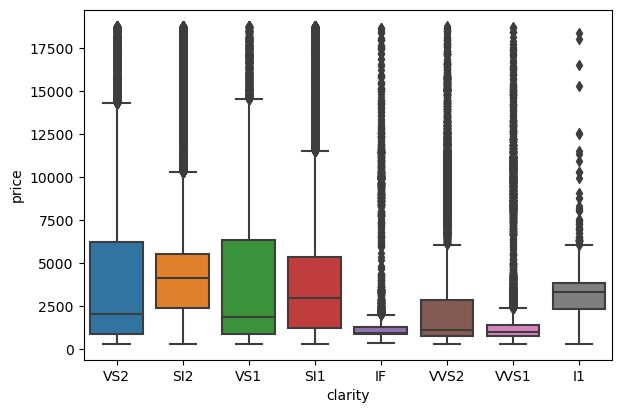

In [11]:
for i in enumerate(cat_cols):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,i[0]+1)
    sn.boxplot(data=df,x=i[1],y='price')

In [16]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

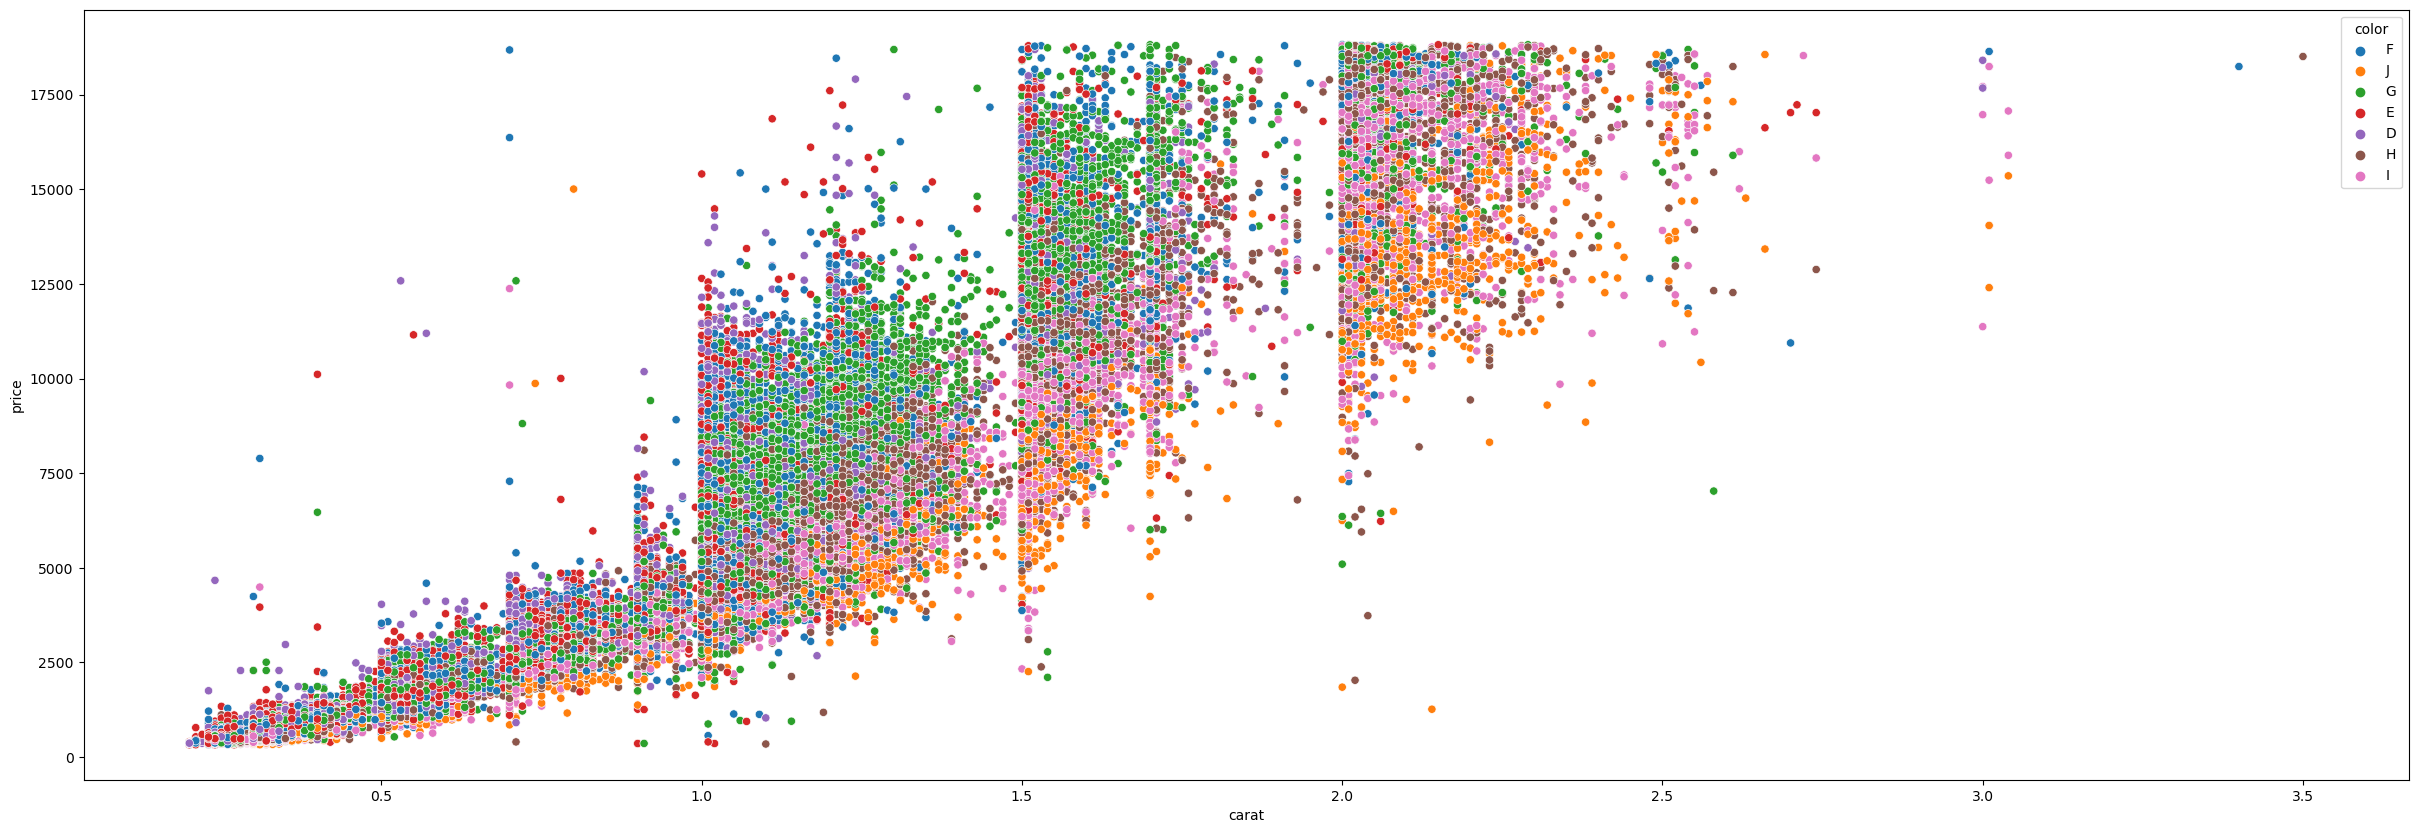

In [17]:
plt.figure(figsize=(30,10))
sn.scatterplot(data=df,x='carat',y='price',hue='color')
plt.show()

In [24]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

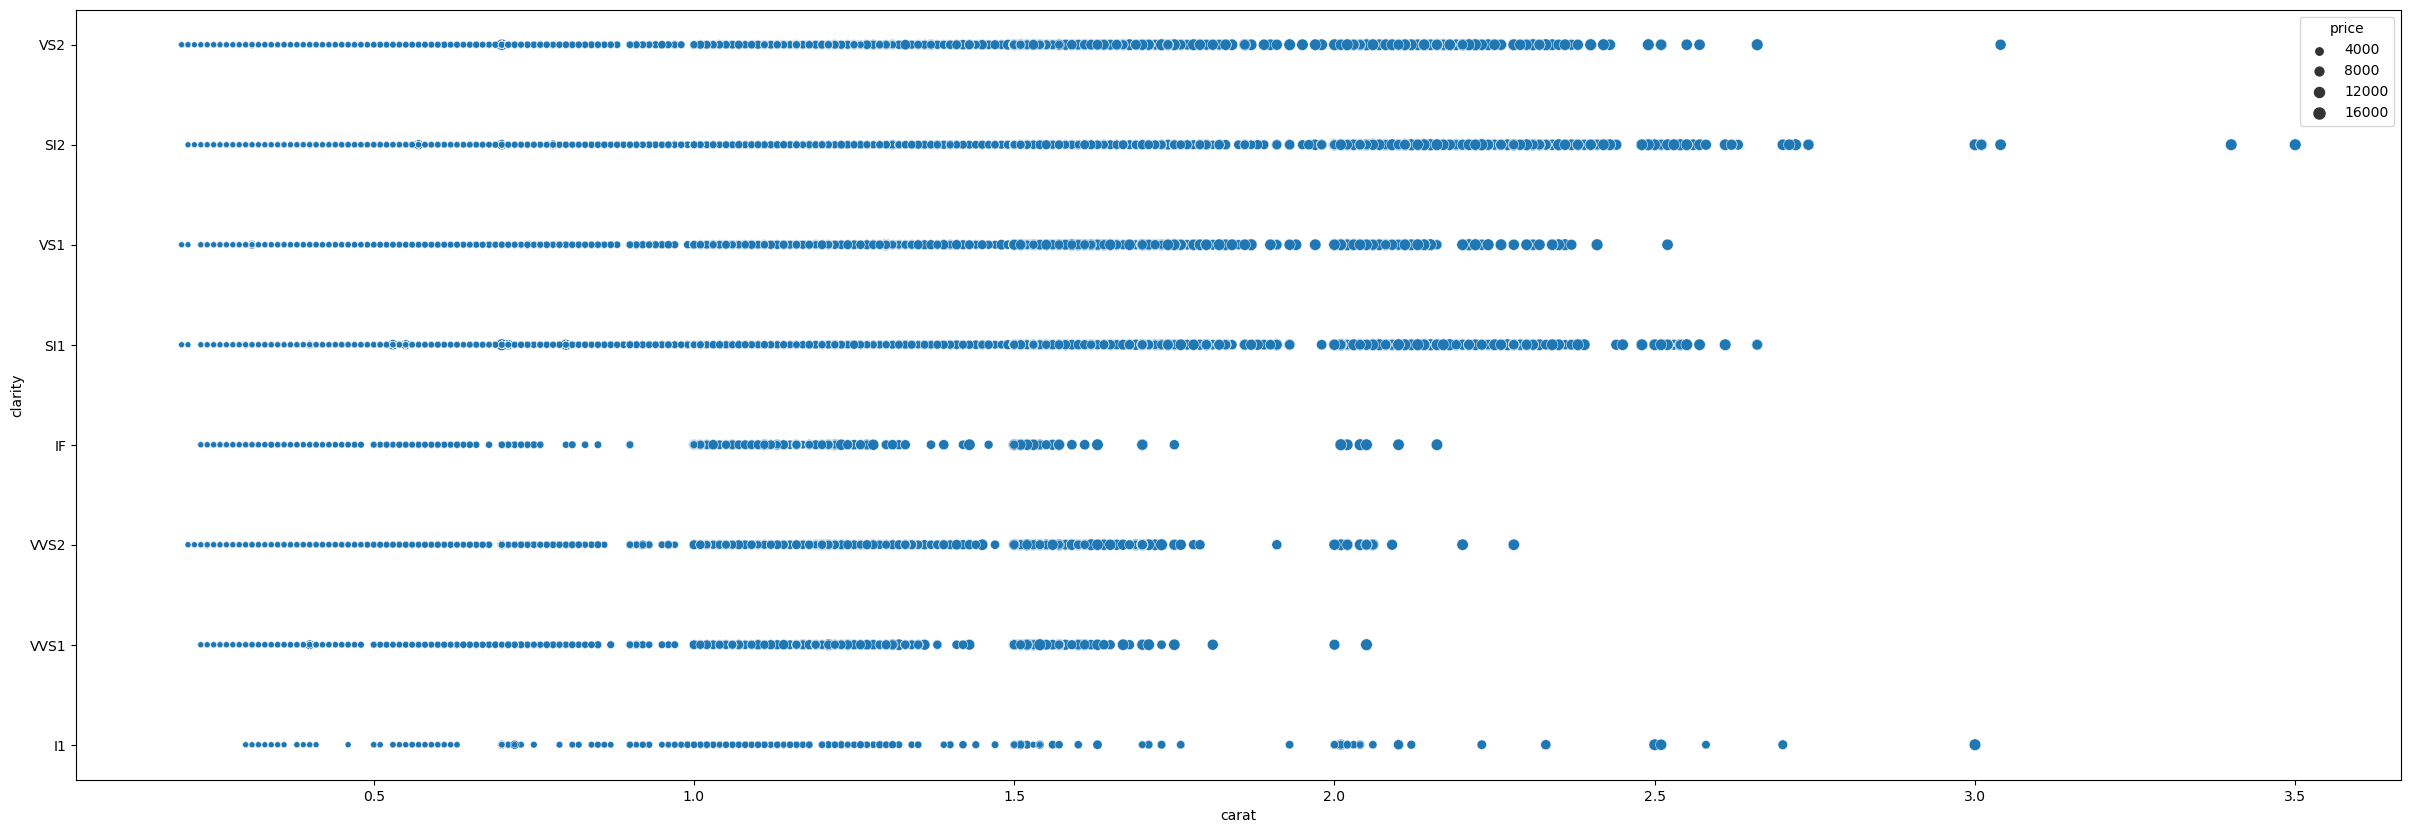

In [25]:
plt.figure(figsize=(30,10))
sn.scatterplot(data=df,x='carat',y='clarity',size="price")
plt.show()

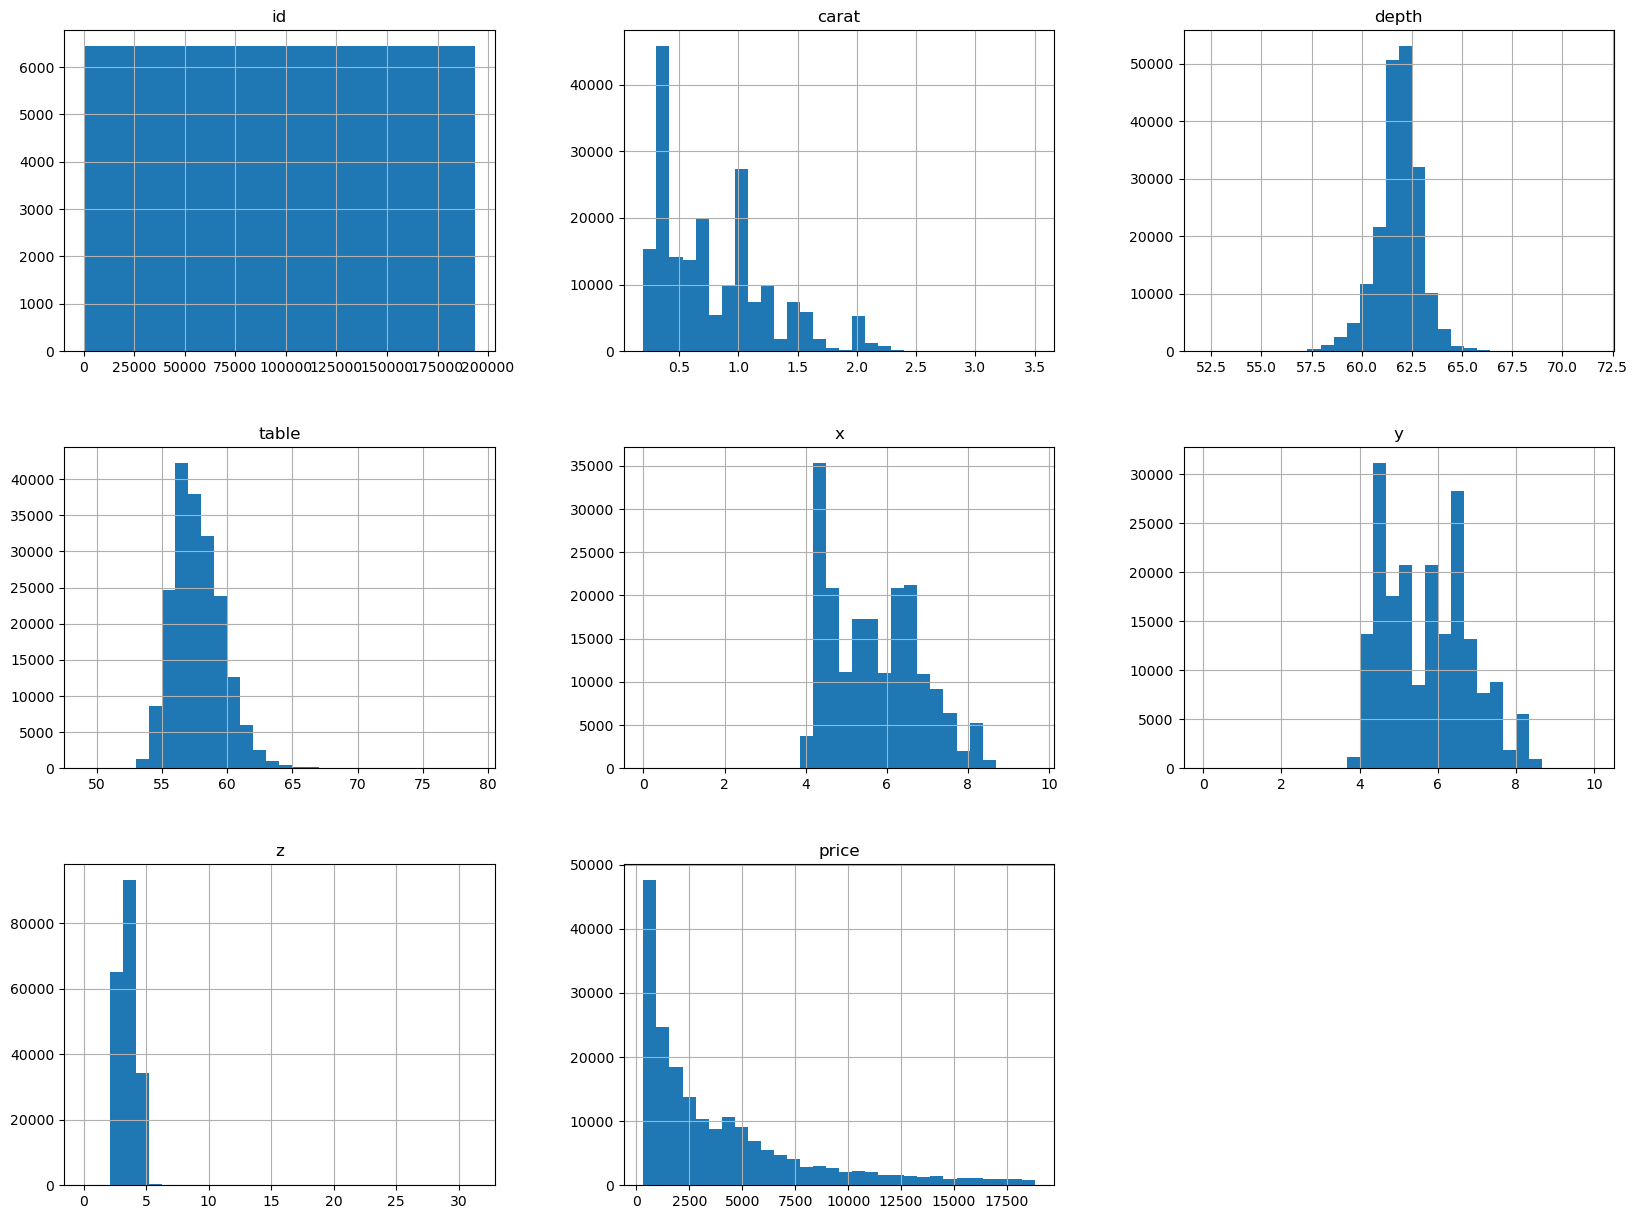

In [18]:
df.hist(bins=30,figsize=(20,15))
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_720\3289141146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap="coolwarm")


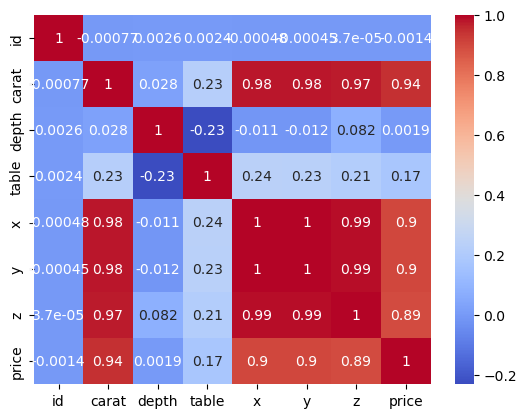

In [19]:
sn.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [14]:
# We will Convert the categorical features and select the feature required for the model by using backward elimination
#For this i am prefering ordinal encoding

In [20]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [21]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [23]:
for i in cat_cols:
    print(df[i].value_counts())
    

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64


In [26]:
df.drop(columns="id",inplace=True)

In [27]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df["clarity"].map(clarity_map)
df["color"]=df["color"].map(color_map)

In [28]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [ ]:
def preprocess(df):
    df.drop(columns="id",inplace=True)
    cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
    clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
    color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
    df['cut']=df['cut'].map(cut_map)
    df['clarity']=df["clarity"].map(clarity_map)
    df["color"]=df["color"].map(color_map)


In [33]:
# linear Regressions and Assuptions in linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df.drop(columns="price")
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)
model=LinearRegression()


In [35]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9366238382247771

In [36]:
model.intercept_

10873.683315145345

In [107]:
r=model.score(x_train,y_train)
n=len(x_train)
p=x_train.shape[1]
model.coef_

array([13874.00710151,    73.05881845,  -285.77881169,   434.54658917,
         -84.43340092,   -34.49989331, -1422.58500149,  -189.49215073,
        -704.87845032])

In [109]:
1-((1-r)*(n-1))/(n-p-1)

0.936620154706385

In [108]:
1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.936620154706385

In [106]:
# Finding Adjusted R2
formula=1-(((1-r)*(n-1))/n-p-1)
formula

6.936624247478169

In [103]:
preds=model.predict(x_test)
residuals=(y_test-preds)
residuals.head()

99346    -306.137855
131771   -440.765464
180688   -405.507718
176620   -484.102047
73302     448.761192
Name: price, dtype: float64

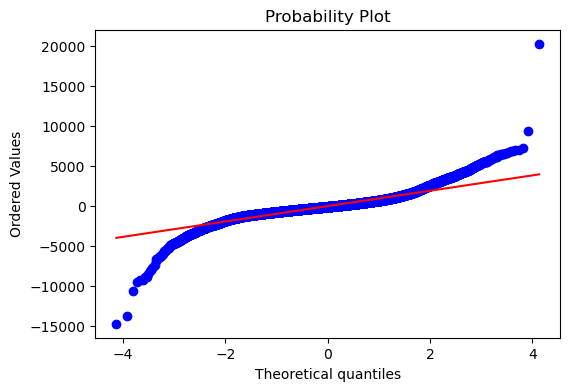

Not normally distributed


E:\SOFTWARES\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


In [48]:
# Very less adjusted R square here 
##QQplot 
import scipy as sp
fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residuals,plot=ax,fit=True)
plt.show()

from statsmodels.stats.diagnostic import normal_ad
p_val=normal_ad(residuals)[1]
if p_val>0.5:
    print("Residuals normally distributed ")
else:
    print("Not normally distributed")


In [52]:
# MultiCollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
data=pd.DataFrame()


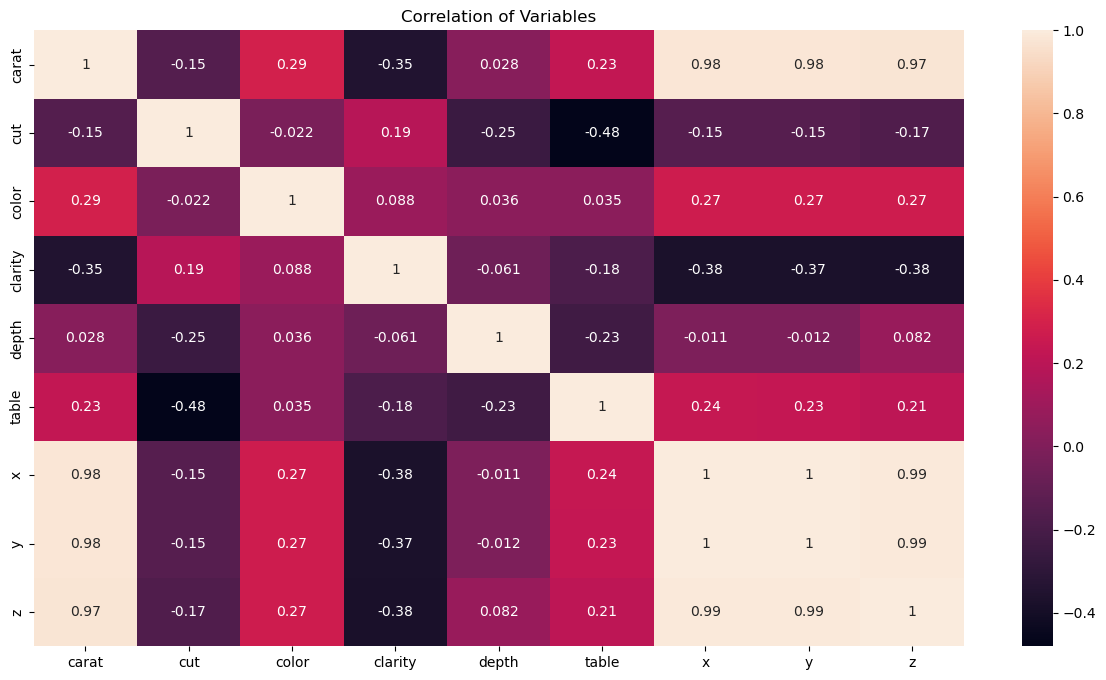

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


In [76]:
 # Plotting the heatmap
plt.figure(figsize = (15,8))
sn.heatmap(X.corr(), annot=True)
plt.title('Correlation of Variables')
plt.show()


data['vif']=[variance_inflation_factor(df,i) for i in range(X.shape[1])]
data['cols']=X.columns
print('Variance Inflation Factors (VIF)')
print('> 10: An indication that multicollinearity may be present')
print('> 100: Certain multicollinearity among the variables')
print('-------------------------------------')
data

In [62]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    
    # Plotting the actual vs predicted values
    sn.lmplot(x=y_test, y=preds, fit_reg=False, size=7)
        

    plt.title('Actual vs. Predicted')
    plt.show()

In [70]:
results=pd.DataFrame()
results['Predicted']=preds
results['Actual']=y_test.values
results

,Predicted,Actual
0,2086.137855,1780
1,2384.765464,1944
2,5243.507718,4838
3,1588.102047,1104
4,4114.238808,4563
...,...,...
38710,1457.391145,1314
38711,423.481693,1175
38712,3180.786907,2857
38713,5801.493346,5220


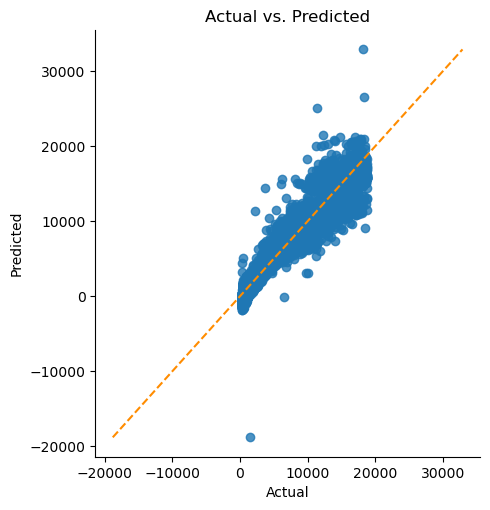

In [73]:
    # Plotting the actual vs predicted values
sn.lmplot(x="Actual", y="Predicted",data=results, fit_reg=True)
line_coords = np.arange(results.min().min(), results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

In [77]:
from statsmodels.stats.stattools import durbin_watson
print('Assumption 4: No Autocorrelation', '\n')
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(residuals)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9987471711597251
Little to no autocorrelation 

Assumption satisfied


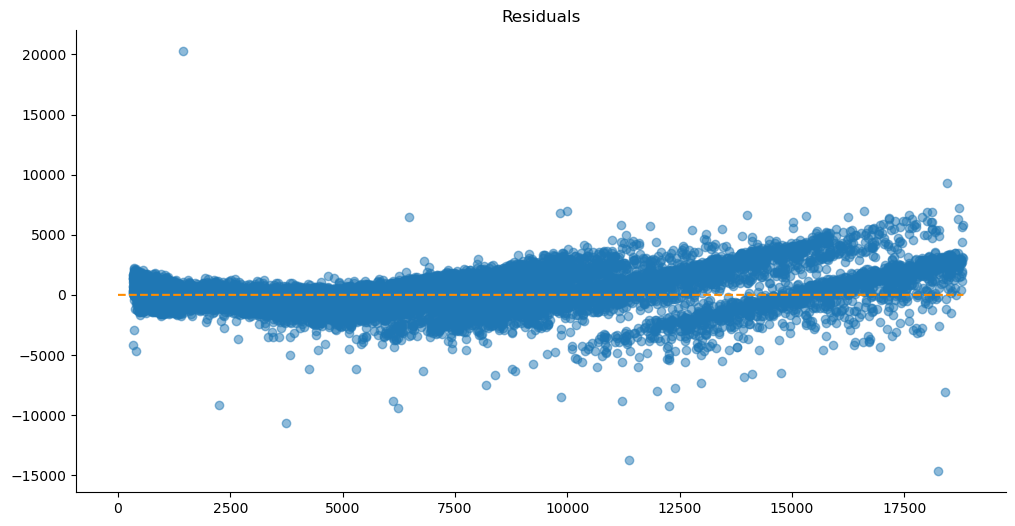

In [78]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=y_test, y=residuals, alpha=0.5)
plt.plot(np.repeat(0, y_test.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

In [80]:
# We have clearly failed lot of our assuptions regaridng LinearRegression
#backward Elimination
from mlxtend.feature_selection import SequentialFeatureSelector as sf
selected_features=sf(model,k_features=5,forward=False)
cols=selected_features.fit(x_train,y_train)


In [82]:
list(cols.k_feature_names_)

['carat', 'color', 'clarity', 'depth', 'x']

In [83]:
selected_cols=['carat', 'color', 'clarity', 'depth', 'x']

In [88]:
lr_model=LinearRegression()
new_x=df[selected_cols]
train_x,test_x,train_y,test_y=train_test_split(new_x,y,test_size=0.2,random_state=2)
lr_model.fit(train_x,train_y)
r2_score=lr_model.score(train_x,train_y)
r2_score

0.9358757533087868

In [121]:
#Preformance
#RMSE
test_preds=lr_model.predict(test_x)
train_preds=lr_model.predict(train_x)
from sklearn.metrics import mean_squared_error
train_error=np.sqrt(mean_squared_error(train_y,train_preds))
test_error=np.sqrt(mean_squared_error(test_y,test_preds))
print("Error on training : " ,train_error,"\n")
print("Error on testing : ",test_error)

Error on training :  1021.638205715798 

Error on testing :  1021.3195863852695


In [123]:
# No over fittting condition but possible underfitting of data

In [124]:
from sklearn.linear_model import ElasticNet

In [135]:

model_elastic=ElasticNet(alpha=0.00001,l1_ratio=0.5)

In [136]:
model_elastic.fit(train_x,train_y)

ElasticNet(alpha=1e-05)

In [137]:
test_preds=model_elastic.predict(test_x)
train_preds=model_elastic.predict(train_x)
from sklearn.metrics import mean_squared_error
train_error=np.sqrt(mean_squared_error(train_y,train_preds))
test_error=np.sqrt(mean_squared_error(test_y,test_preds))
print("Error on training : " ,train_error,"\n")
print("Error on testing : ",test_error)

Error on training :  1021.6385492201392 

Error on testing :  1021.3271219196838
